# Employee Retention Rate

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
# Importing the dataset
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 9].values

# Take a Look of Dataset

In [3]:
# Take a look of Dataset
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [4]:
dataset["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [5]:
dataset["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


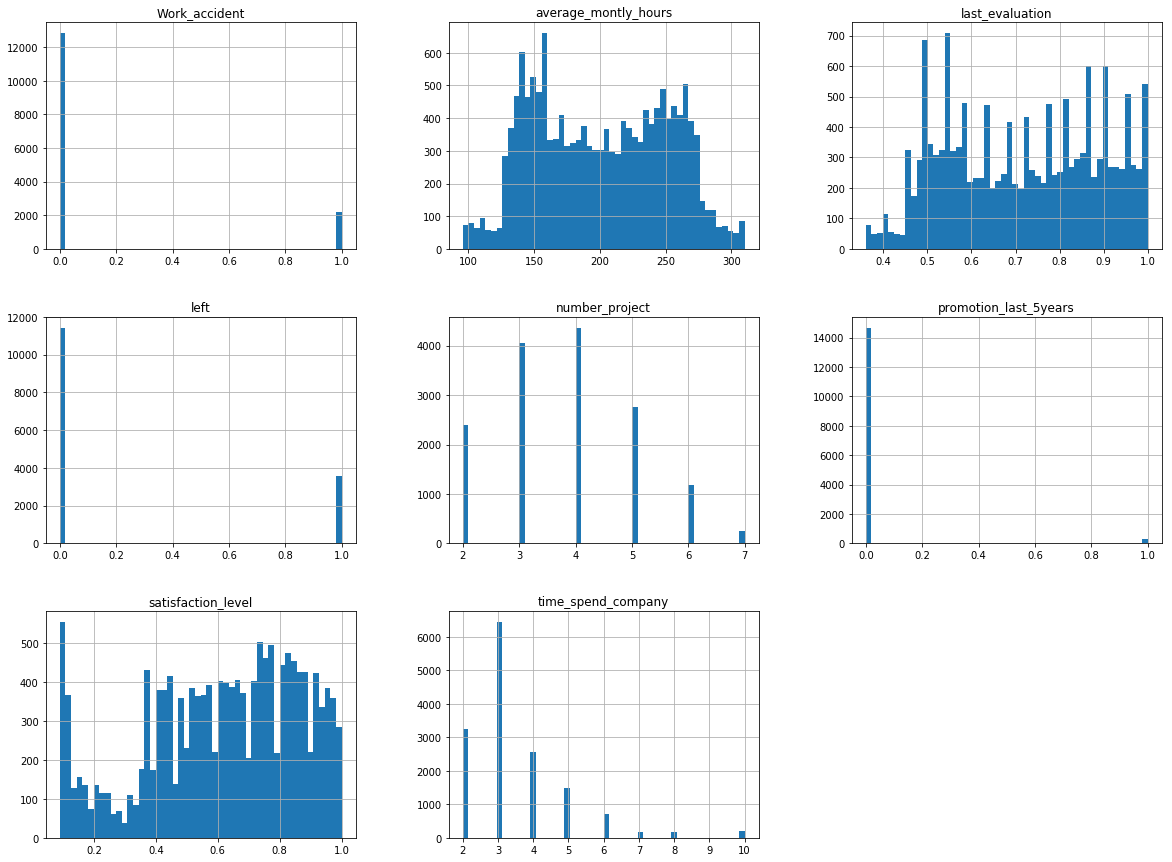

In [8]:
dataset.hist(bins = 50, figsize = (20, 15))
plt.show()

In [9]:
# Encoding categorical data
labelencoder_X = LabelEncoder()
X[:, 8] = labelencoder_X.fit_transform(X[:, 8])
X[:, 7] = labelencoder_X.fit_transform(X[:, 7])
X = X.astype(np.float64)

In [10]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(len(X_train), "train +", len(X_test), "test")

11999 train + 3000 test


In [11]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
def plot_roc_curve(fpr, tpr, c, l):  
    plt.plot(fpr, tpr, color=c, label=l)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

# Fitting Random Forestn classifier

In [34]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_features = 0.34, max_depth = 20)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=0.34, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
# Predicting a new result
y_rfc = rfc.predict(X_test)
y_rfc = np.round(y_rfc)
# Making the Confusion Matrix
confusion_matrix(y_test, y_rfc)

array([[2294,    5],
       [  16,  685]], dtype=int64)

In [15]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("mean = ", accuracies.mean())
print("sta = ", accuracies.std())

[0.99       0.98916667 0.9875     0.9975     0.99083333 0.99
 0.99       0.99333333 0.98833333 0.99332777]
mean =  0.9909994439810953
sta =  0.002808255137343081


AUC: 0.99


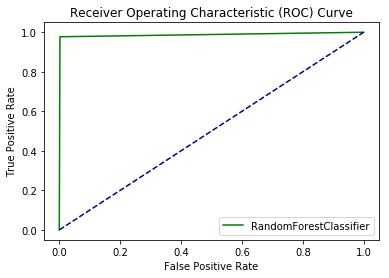

In [16]:
# Receiver Operating Characteristic(ROC) curve
auc = roc_auc_score(y_test, y_rfc)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, y_rfc)
plot_roc_curve(fpr, tpr, 'green', 'RandomForestClassifier')

# Fitting Gradient Boosting Classifier

In [17]:
# Fitting classifier to the Training set
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.1, max_features = 0.5, n_estimators = 700, max_depth = 4)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=0.5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=700,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [18]:
# Predicting a new result
y_gbc = gbc.predict(X_test)
y_gbc = np.round(y_gbc)
# Making the Confusion Matrix
confusion_matrix(y_test, y_gbc)

array([[2282,   17],
       [  21,  680]], dtype=int64)

In [19]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gbc, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("mean = ", accuracies.mean())
print("sta = ", accuracies.std())

[0.9875     0.98666667 0.98333333 0.9925     0.99083333 0.99
 0.98666667 0.98583333 0.9875     0.98748957]
mean =  0.9878322907978874
sta =  0.002505690041351895


AUC: 0.98


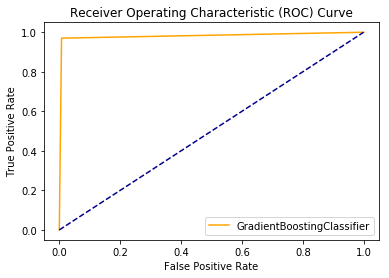

In [20]:
# Receiver Operating Characteristic(ROC) curve
auc = roc_auc_score(y_test, y_gbc)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, y_gbc)
plot_roc_curve(fpr, tpr, 'orange', 'GradientBoostingClassifier')

# Fitting K-Nearest Neighbors

In [21]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski',n_jobs = -1, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
# Predicting a new result
y_knn = knn.predict(X_test)
y_knn = np.round(y_knn)
# Making the Confusion Matrix
confusion_matrix(y_test, y_knn)

array([[2241,   58],
       [  22,  679]], dtype=int64)

In [23]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("mean = ", accuracies.mean())
print("sta = ", accuracies.std())

[0.96833333 0.9675     0.965      0.97333333 0.97666667 0.96583333
 0.965      0.97166667 0.97083333 0.97247706]
mean =  0.9696643730886851
sta =  0.0037473465222953813


AUC: 0.97


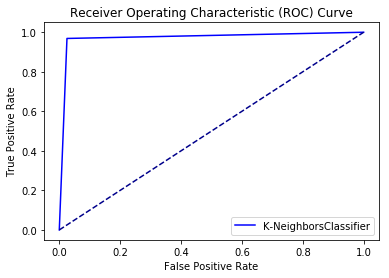

In [24]:
# Receiver Operating Characteristic(ROC) curve
auc = roc_auc_score(y_test, y_knn)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, y_knn)
plot_roc_curve(fpr, tpr, 'blue', 'K-NeighborsClassifier')

# Fitting Support Vector Machine (SVM)

In [25]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# Predicting a new result
y_svm = svm.predict(X_test)
y_svm = np.round(y_svm)
# Making the Confusion Matrix
confusion_matrix(y_test, y_svm)

array([[2164,  135],
       [ 529,  172]], dtype=int64)

In [27]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("mean = ", accuracies.mean())
print("sta = ", accuracies.std())

[0.76083333 0.75833333 0.76083333 0.76666667 0.76083333 0.77416667
 0.77166667 0.77333333 0.76083333 0.76063386]
mean =  0.7648133861551293
sta =  0.0057731988621182746


AUC: 0.59


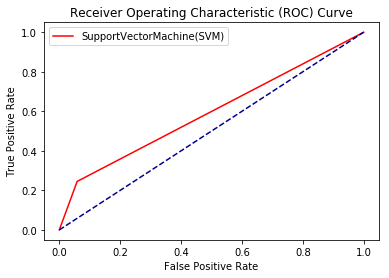

In [28]:
# Receiver Operating Characteristic(ROC) curve
auc = roc_auc_score(y_test, y_svm)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, y_svm)
plot_roc_curve(fpr, tpr, 'red', 'SupportVectorMachine(SVM)')

# Fitting Logistic Regression

In [29]:
# Fitting classifier to the Training set
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression(C = 1.0, penalty ='l2',random_state = 0)
lgc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# Predicting a new result
y_lgc = lgc.predict(X_test)
y_lgc = np.round(y_lgc)
# Making the Confusion Matrix
confusion_matrix(y_test, y_lgc)

array([[2115,  184],
       [ 524,  177]], dtype=int64)

In [31]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lgc, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("mean = ", accuracies.mean())
print("sta = ", accuracies.std())

[0.765      0.74833333 0.7775     0.7625     0.775      0.76083333
 0.76333333 0.7575     0.77916667 0.77147623]
mean =  0.7660642896858493
sta =  0.009208558753977662


AUC: 0.59


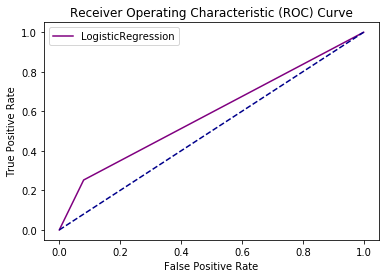

In [32]:
# Receiver Operating Characteristic(ROC) curve
auc = roc_auc_score(y_test, y_lgc)  
print('AUC: %.2f' % auc) 
fpr, tpr, thresholds = roc_curve(y_test, y_lgc)
plot_roc_curve(fpr, tpr, 'purple', 'LogisticRegression')

# Receiver Operating Characteristic (ROC) curve

<Figure size 432x288 with 0 Axes>

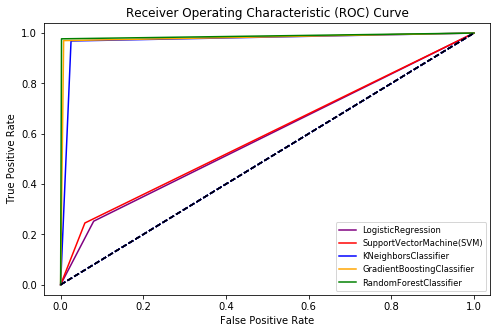

In [33]:
plt.clf()
plt.figure(figsize=(8,5))
fpr, tpr, thresholds = roc_curve(y_test, y_lgc)
plot_roc_curve(fpr, tpr, 'purple', 'LogisticRegression')
fpr, tpr, thresholds = roc_curve(y_test, y_svm)
plot_roc_curve(fpr, tpr, 'red', 'SupportVectorMachine(SVM)')
fpr, tpr, thresholds = roc_curve(y_test, y_knn)
plot_roc_curve(fpr, tpr, 'blue', 'KNeighborsClassifier')
fpr, tpr, thresholds = roc_curve(y_test, y_gbc)
plot_roc_curve(fpr, tpr, 'orange', 'GradientBoostingClassifier')
fpr, tpr, thresholds = roc_curve(y_test, y_rfc)
plot_roc_curve(fpr, tpr, 'green', 'RandomForestClassifier') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.04, 1.04])
plt.ylim([-0.04, 1.04])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()